In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [49]:
df=pd.read_csv('experiment_raw.csv')

# Необходимо:
1) Выбрать релевантный тест и определить есть ли статистически значимая разница между ветками эксперимента по уровню попыток покупки и уровню успешных покупок.

2) Проверить эффект в разрезе операционных систем.

3) Проверить устойчивость эффекта во времени.

4) Подвести итоги

In [50]:
df

,id,date,country,os,experiment_mobile_checkout_theme,transaction_try,transaction_success
0,10500155,2020-05-21,USA,android,mobile_checkout_theme_old,0,0
1,10500150,2020-05-21,USA,ios,mobile_checkout_theme_new,0,0
2,10500139,2020-05-21,USA,android,mobile_checkout_theme_new,0,0
3,10500135,2020-05-21,USA,ios,mobile_checkout_theme_new,0,0
4,10500134,2020-05-21,USA,android,mobile_checkout_theme_new,0,0
...,...,...,...,...,...,...,...
27949,10500004,2020-05-21,USA,ios,mobile_checkout_theme_old,1,1
27950,10500027,2020-05-21,USA,android,mobile_checkout_theme_old,1,1
27951,10500077,2020-05-21,USA,ios,mobile_checkout_theme_old,1,1
27952,10498122,2020-05-21,USA,android,mobile_checkout_theme_new,1,1


# Исследовательский анализ данных и очистка данных

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27954 entries, 0 to 27953
Data columns (total 7 columns):
id                                  27954 non-null int64
date                                27954 non-null object
country                             27954 non-null object
os                                  27950 non-null object
experiment_mobile_checkout_theme    27954 non-null object
transaction_try                     27954 non-null int64
transaction_success                 27954 non-null int64
dtypes: int64(3), object(4)
memory usage: 1.5+ MB


In [52]:
df.isna().sum()

id                                  0
date                                0
country                             0
os                                  4
experiment_mobile_checkout_theme    0
transaction_try                     0
transaction_success                 0
dtype: int64

In [53]:
# чистим от нанов
df=df.dropna()
df.isna().sum()

id                                  0
date                                0
country                             0
os                                  0
experiment_mobile_checkout_theme    0
transaction_try                     0
transaction_success                 0
dtype: int64

In [54]:
df.duplicated().sum()

2193

In [55]:
# duplicated:
df[df.duplicated()]

,id,date,country,os,experiment_mobile_checkout_theme,transaction_try,transaction_success
3939,10436998,2020-05-17,USA,ios,mobile_checkout_theme_old,1,0
3940,10436998,2020-05-17,USA,ios,mobile_checkout_theme_old,1,0
4164,10433205,2020-05-16,USA,ios,mobile_checkout_theme_old,1,0
5310,10415265,2020-05-15,USA,android,mobile_checkout_theme_old,1,0
9046,10361888,2020-05-11,USA,ios,mobile_checkout_theme_old,1,0
...,...,...,...,...,...,...,...
27939,10497665,2020-05-21,USA,ios,mobile_checkout_theme_old,1,0
27942,10499902,2020-05-21,USA,ios,mobile_checkout_theme_new,1,0
27943,10499902,2020-05-21,USA,ios,mobile_checkout_theme_new,1,0
27945,10499901,2020-05-21,USA,ios,mobile_checkout_theme_new,1,0


In [56]:
# Удаление дубликатов
df= df.drop_duplicates().reset_index(drop=True)
df

,id,date,country,os,experiment_mobile_checkout_theme,transaction_try,transaction_success
0,10500155,2020-05-21,USA,android,mobile_checkout_theme_old,0,0
1,10500150,2020-05-21,USA,ios,mobile_checkout_theme_new,0,0
2,10500139,2020-05-21,USA,android,mobile_checkout_theme_new,0,0
3,10500135,2020-05-21,USA,ios,mobile_checkout_theme_new,0,0
4,10500134,2020-05-21,USA,android,mobile_checkout_theme_new,0,0
...,...,...,...,...,...,...,...
25752,10500004,2020-05-21,USA,ios,mobile_checkout_theme_old,1,1
25753,10500027,2020-05-21,USA,android,mobile_checkout_theme_old,1,1
25754,10500077,2020-05-21,USA,ios,mobile_checkout_theme_old,1,1
25755,10498122,2020-05-21,USA,android,mobile_checkout_theme_new,1,1


In [57]:
# Переведем дату в тип ДАТА
df['date'] = pd.to_datetime(df['date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25757 entries, 0 to 25756
Data columns (total 7 columns):
id                                  25757 non-null int64
date                                25757 non-null datetime64[ns]
country                             25757 non-null object
os                                  25757 non-null object
experiment_mobile_checkout_theme    25757 non-null object
transaction_try                     25757 non-null int64
transaction_success                 25757 non-null int64
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 1.4+ MB


# Общая статистика

In [58]:
df.transaction_try[df.experiment_mobile_checkout_theme=='mobile_checkout_theme_new'].count()

12843

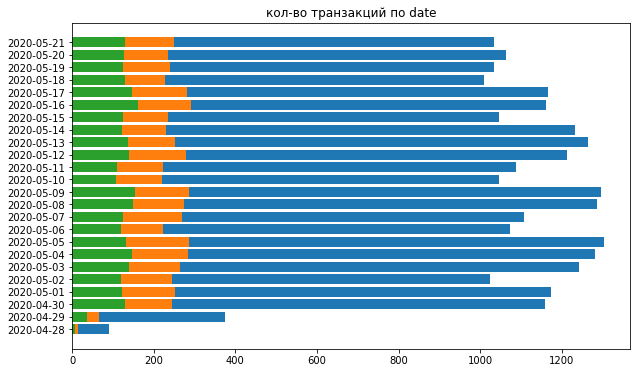

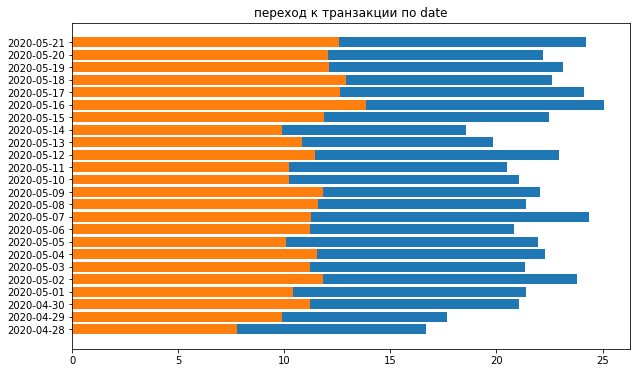

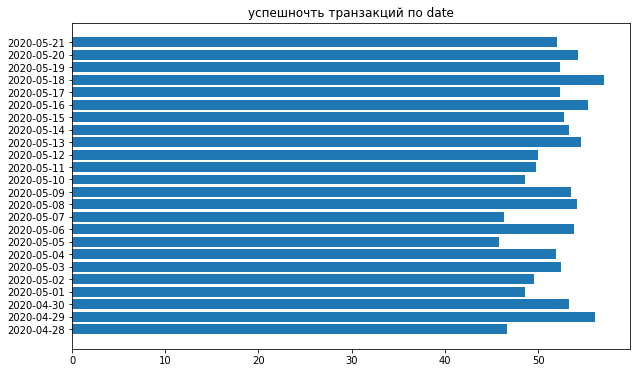

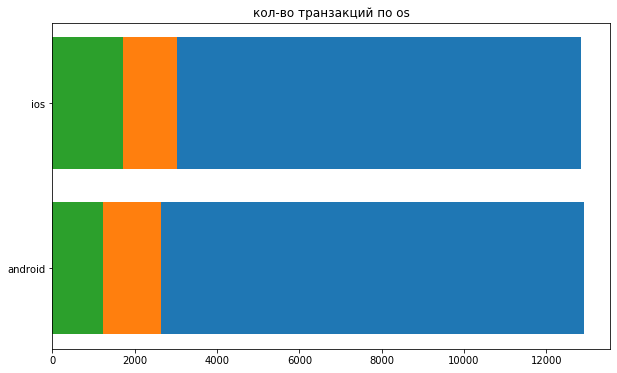

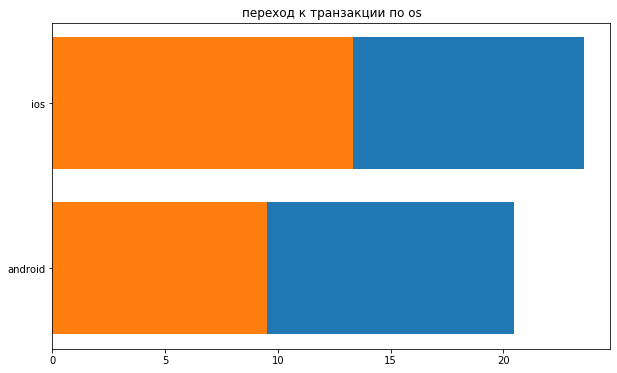

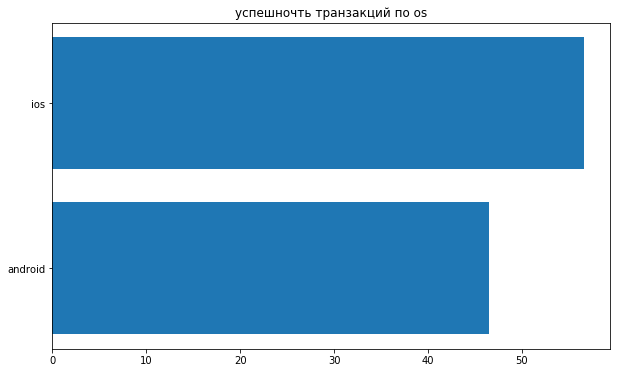

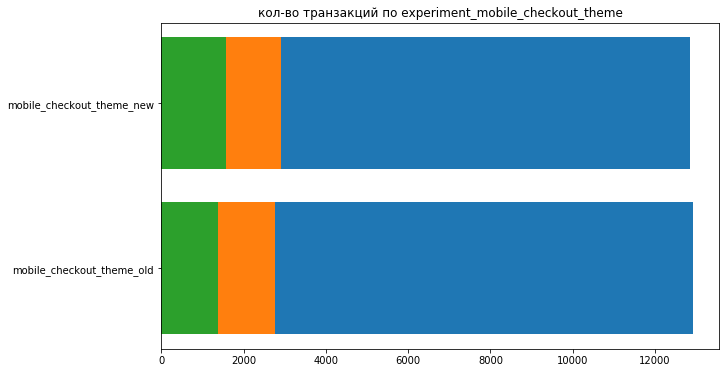

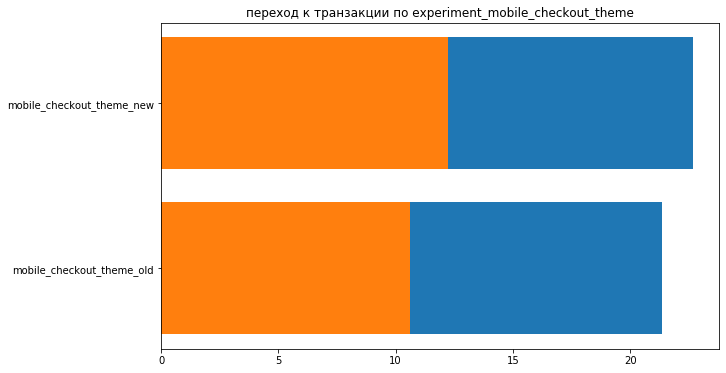

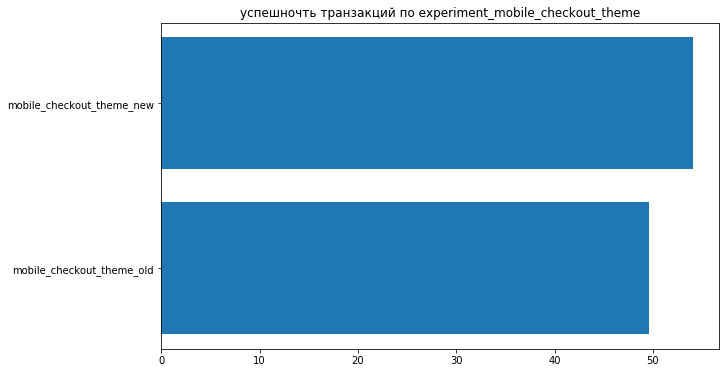

In [59]:
for i in ['date', 'os', 'experiment_mobile_checkout_theme']:
    parametr = [x for x in df[i].unique()]
    # Количество записей all(синий) 
    alls = [df.transaction_try[df[i]==x].count() for x in parametr]
    # попытка тразакции(Оранжевый) 
    transaction_trys = [df.transaction_try[df[i]==x].sum() for x in parametr]
    # успешная транзакция(зеленый)
    transaction_successes = [df.transaction_success[df[i]==x].sum() for x in parametr]

    fig, ax = plt.subplots()
    plt.title('кол-во транзакций по '+ i)
    ax.barh(parametr, alls)
    ax.barh(parametr, transaction_trys)
    ax.barh(parametr, transaction_successes)
    ax.set_yticks(parametr)
    fig.set_figwidth(10)
    fig.set_figheight(6)

    # процент попытки транзакции от всех записей (синий) и поцент успешных трнзакций
    fig, ax = plt.subplots()
    plt.title('переход к транзакции по '+ i)
    ax.barh(parametr, np.array(transaction_trys)/np.array(alls)*100)
    ax.barh(parametr, np.array(transaction_successes)/np.array(alls)*100)
    ax.set_yticks(parametr)
    fig.set_figwidth(10)
    fig.set_figheight(6)
    
    # процент успешных транзакций
    fig, ax = plt.subplots()
    plt.title('успешночть транзакций по '+ i)
    ax.barh(parametr, np.array(transaction_successes)/np.array(transaction_trys)*100)
    ax.set_yticks(parametr)
    fig.set_figwidth(10)
    fig.set_figheight(6)



# Ярче всего разница видна в успешныйх транзакциях в сегменте операционной системы
# На втором месте влияние версии чекаута (всего несколько %)
## Проверим это на временном диапазоне

##### OS

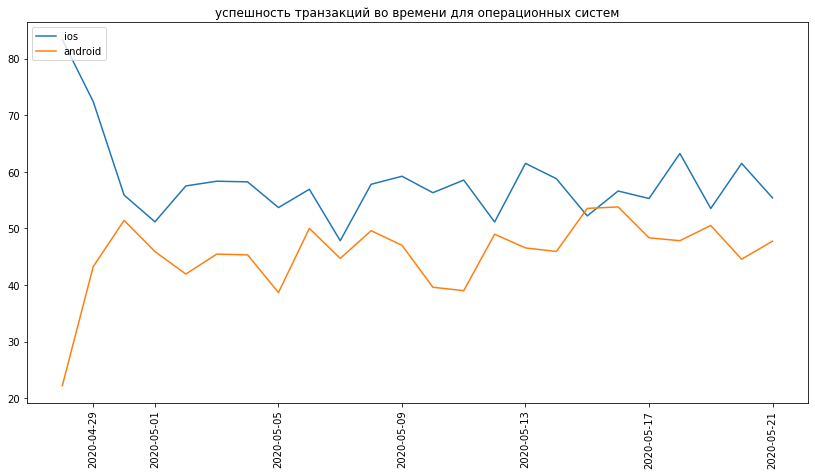

In [60]:
parametr = [x for x in df['date'].unique()]
# процент подтвержденных транзакций android
transaction_trys_android = [100*df.transaction_success[(df.os=='android')&(df.date==x)].sum()/df.transaction_try[(df.os=='android')&(df.date==x)].sum() 
                            for x in parametr]
# процент подтвержденных транзакций ios
transaction_trys_ios = [100*df.transaction_success[(df.os=='ios')&(df.date==x)].sum()/df.transaction_try[(df.os=='ios')&(df.date==x)].sum() 
                            for x in parametr]
fig, ax = plt.subplots()
plt.plot(parametr, transaction_trys_ios)
plt.plot(parametr, transaction_trys_android)
ax.set_title('успешность транзакций во времени для операционных систем')
ax.legend(['ios', 'android'],loc='upper left')
fig.set_figwidth(14)
fig.set_figheight(7)
plt.xticks(rotation=90)
plt.show()


### experiment_mobile_checkout_theme

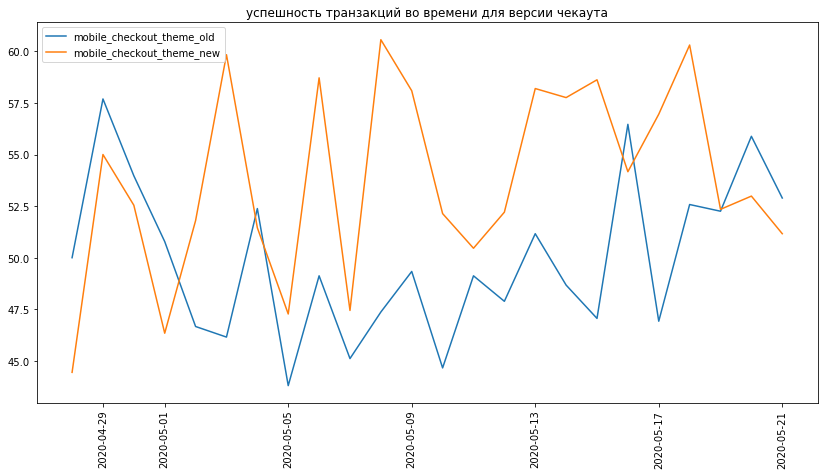

In [61]:
parametr = [x for x in df['date'].unique()]
# процент подтвержденных транзакций mobile_checkout_theme_old
transaction_trys_old = [100*
                            df.transaction_success[(df.experiment_mobile_checkout_theme=='mobile_checkout_theme_old')&(df.date==x)].sum()/
                            df.transaction_try[(df.experiment_mobile_checkout_theme=='mobile_checkout_theme_old')&(df.date==x)].sum() 
                            for x in parametr]
# процент подтвержденных транзакций mobile_checkout_theme_new
transaction_trys_new = [100*
                            df.transaction_success[(df.experiment_mobile_checkout_theme=='mobile_checkout_theme_new')&(df.date==x)].sum()/
                            df.transaction_try[(df.experiment_mobile_checkout_theme=='mobile_checkout_theme_new')&(df.date==x)].sum() 
                            for x in parametr]
fig, ax = plt.subplots()
plt.plot(parametr, transaction_trys_old)
plt.plot(parametr, transaction_trys_new)
ax.set_title('успешность транзакций во времени для версии чекаута')
ax.legend(['mobile_checkout_theme_old', 'mobile_checkout_theme_new'],loc='upper left')
fig.set_figwidth(14)
fig.set_figheight(7)
plt.xticks(rotation=90)
plt.show()


# Результат
Видим существенное влияние операционной системы на всем временном диапазоне (IOS лидирует) 
С Версией чекаута все не так однозначно: 
    в большенсве своем лидирует новая версия, но ежедневный график не стабильный, о чем сведетельствует большая 
    амплитуда колебаний. Это может быть связоно с днями недели. Посмотрим в разрезе по дням недели и по неделям

In [62]:
df['day_of_week']=df.date.dt.day_name()
df['week']  = df.date.dt.week
df

,id,date,country,os,experiment_mobile_checkout_theme,transaction_try,transaction_success,day_of_week,week
0,10500155,2020-05-21,USA,android,mobile_checkout_theme_old,0,0,Thursday,21
1,10500150,2020-05-21,USA,ios,mobile_checkout_theme_new,0,0,Thursday,21
2,10500139,2020-05-21,USA,android,mobile_checkout_theme_new,0,0,Thursday,21
3,10500135,2020-05-21,USA,ios,mobile_checkout_theme_new,0,0,Thursday,21
4,10500134,2020-05-21,USA,android,mobile_checkout_theme_new,0,0,Thursday,21
...,...,...,...,...,...,...,...,...,...
25752,10500004,2020-05-21,USA,ios,mobile_checkout_theme_old,1,1,Thursday,21
25753,10500027,2020-05-21,USA,android,mobile_checkout_theme_old,1,1,Thursday,21
25754,10500077,2020-05-21,USA,ios,mobile_checkout_theme_old,1,1,Thursday,21
25755,10498122,2020-05-21,USA,android,mobile_checkout_theme_new,1,1,Thursday,21


#### Day of week

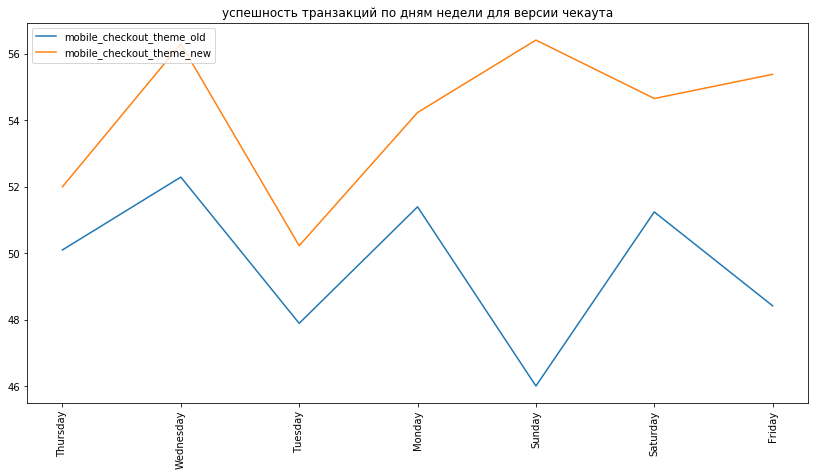

In [63]:
parametr = [x for x in df['day_of_week'].unique()]
# процент подтвержденных транзакций mobile_checkout_theme_old
transaction_trys_old = [100*
                            df.transaction_success[(df.experiment_mobile_checkout_theme=='mobile_checkout_theme_old')&(df.day_of_week==x)].sum()/
                            df.transaction_try[(df.experiment_mobile_checkout_theme=='mobile_checkout_theme_old')&(df.day_of_week==x)].sum() 
                            for x in parametr]
# процент подтвержденных транзакций mobile_checkout_theme_new
transaction_trys_new = [100*
                            df.transaction_success[(df.experiment_mobile_checkout_theme=='mobile_checkout_theme_new')&(df.day_of_week==x)].sum()/
                            df.transaction_try[(df.experiment_mobile_checkout_theme=='mobile_checkout_theme_new')&(df.day_of_week==x)].sum() 
                            for x in parametr]
fig, ax = plt.subplots()
plt.plot(parametr, transaction_trys_old)
plt.plot(parametr, transaction_trys_new)
ax.set_title('успешность транзакций по дням недели для версии чекаута')
ax.legend(['mobile_checkout_theme_old', 'mobile_checkout_theme_new'],loc='upper left')
fig.set_figwidth(14)
fig.set_figheight(7)
plt.xticks(rotation=90)
plt.show()


#### Week

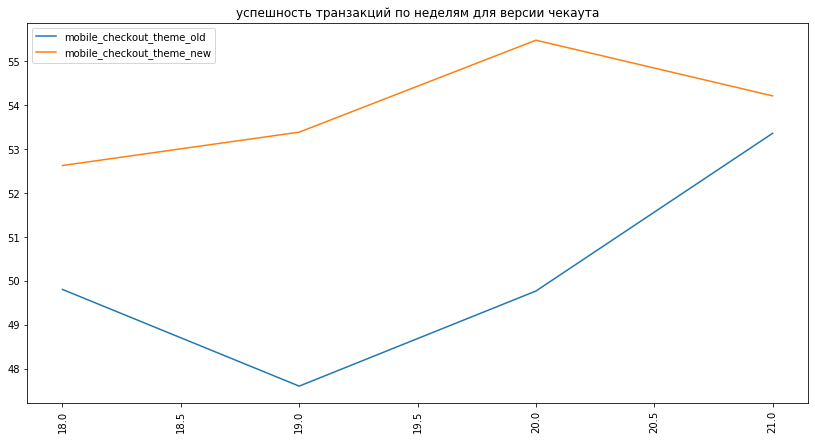

In [64]:
parametr = [x for x in df['week'].unique()]
# процент подтвержденных транзакций mobile_checkout_theme_old
transaction_trys_old = [100*
                            df.transaction_success[(df.experiment_mobile_checkout_theme=='mobile_checkout_theme_old')&(df.week==x)].sum()/
                            df.transaction_try[(df.experiment_mobile_checkout_theme=='mobile_checkout_theme_old')&(df.week==x)].sum() 
                            for x in parametr]
# процент подтвержденных транзакций mobile_checkout_theme_new
transaction_trys_new = [100*
                            df.transaction_success[(df.experiment_mobile_checkout_theme=='mobile_checkout_theme_new')&(df.week==x)].sum()/
                            df.transaction_try[(df.experiment_mobile_checkout_theme=='mobile_checkout_theme_new')&(df.week==x)].sum() 
                            for x in parametr]
fig, ax = plt.subplots()
plt.plot(parametr, transaction_trys_old)
plt.plot(parametr, transaction_trys_new)
ax.set_title('успешность транзакций по неделям для версии чекаута')
ax.legend(['mobile_checkout_theme_old', 'mobile_checkout_theme_new'],loc='upper left')
fig.set_figwidth(14)
fig.set_figheight(7)
plt.xticks(rotation=90)
plt.show()